# Implementing the Gradient Descent Algorithm

In this lab, we'll implement the basic functions of the Gradient Descent algorithm to find the boundary in a small dataset. First, we'll start with some functions that will help us plot and visualize the data.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#Some helper functions for plotting and drawing lines

def plot_points(X, y):
    admitted = X[np.argwhere(y==1)]
    rejected = X[np.argwhere(y==0)]
    plt.scatter([s[0][0] for s in rejected], [s[0][1] for s in rejected], s = 25, color = 'blue', edgecolor = 'k')
    plt.scatter([s[0][0] for s in admitted], [s[0][1] for s in admitted], s = 25, color = 'red', edgecolor = 'k')

def display(m, b, color='g--'):
    plt.xlim(-0.05,1.05)
    plt.ylim(-0.05,1.05)
    x = np.arange(-10, 10, 0.1)
    plt.plot(x, m*x+b, color)

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Reading and plotting the data

[[ 0.78051   -0.063669 ]
 [ 0.28774    0.29139  ]
 [ 0.40714    0.17878  ]
 [ 0.2923     0.4217   ]
 [ 0.50922    0.35256  ]
 [ 0.27785    0.10802  ]
 [ 0.27527    0.33223  ]
 [ 0.43999    0.31245  ]
 [ 0.33557    0.42984  ]
 [ 0.23448    0.24986  ]
 [ 0.0084492  0.13658  ]
 [ 0.12419    0.33595  ]
 [ 0.25644    0.42624  ]
 [ 0.4591     0.40426  ]
 [ 0.44547    0.45117  ]
 [ 0.42218    0.20118  ]
 [ 0.49563    0.21445  ]
 [ 0.30848    0.24306  ]
 [ 0.39707    0.44438  ]
 [ 0.32945    0.39217  ]
 [ 0.40739    0.40271  ]
 [ 0.3106     0.50702  ]
 [ 0.49638    0.45384  ]
 [ 0.10073    0.32053  ]
 [ 0.69907    0.37307  ]
 [ 0.29767    0.69648  ]
 [ 0.15099    0.57341  ]
 [ 0.16427    0.27759  ]
 [ 0.33259    0.055964 ]
 [ 0.53741    0.28637  ]
 [ 0.19503    0.36879  ]
 [ 0.40278    0.035148 ]
 [ 0.21296    0.55169  ]
 [ 0.48447    0.56991  ]
 [ 0.25476    0.34596  ]
 [ 0.21726    0.28641  ]
 [ 0.67078    0.46538  ]
 [ 0.3815     0.4622   ]
 [ 0.53838    0.32774  ]
 [ 0.4849     0.26071  ]


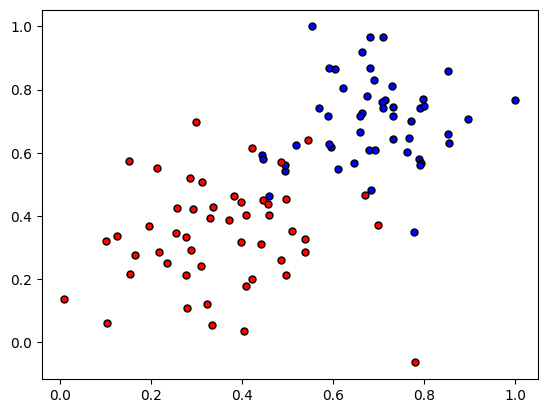

In [ ]:

data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/data_humanoid1.csv", header=None)
X = np.array(data[[0,1]])
y = np.array(data[2])
print(X)
print(y)
plot_points(X,y)
plt.show()

## TODO: Implementing the basic functions
Here is your turn to shine. Implement the following formulas, as explained in the text.
- Sigmoid activation function

$$\sigma(x) = \frac{1}{1+e^{-x}}$$

- Output (prediction) formula

$$\hat{y} = \sigma(w_1 x_1 + w_2 x_2 + b)$$

- Error function

$$Error(y, \hat{y}) = - y \log(\hat{y}) - (1-y) \log(1-\hat{y})$$

- The function that updates the weights

$$ w_i \longrightarrow w_i + \alpha (y - \hat{y}) x_i$$

$$ b \longrightarrow b + \alpha (y - \hat{y})$$

In [ ]:
# Implement the following functions

# Activation (sigmoid) function
def sigmoid(x):
  activation = 1/(1+np.exp(-x))
  return activation

# Output (prediction) formula
def output_formula(features, weights, bias):
    y = sigmoid(np.dot(features,weights) + bias)
    return y

# Error (log-loss) formula
def error_formula(y, output):
    error = np.dot((-1*y),np.log(output)) - np.dot((1-y),np.log(1-output))
    return error
# Gradient descent step
def update_weights(x, y, weights, bias, learnrate):
    y_output = output_formula(x,weights,bias)
    weights += learnrate*np.dot((y-y_output),x)
    bias += learnrate*(y-y_output)
    return weights, bias

## Training function
This function will help us iterate the gradient descent algorithm through all the data, for a number of epochs. It will also plot the data, and some of the boundary lines obtained as we run the algorithm.

In [ ]:
np.random.seed(44)


#try to change the following two values to increase the accuracy
epochs = 500
learnrate = 0.05

def train(features, targets, epochs, learnrate, graph_lines=False):

    errors = []
    n_records, n_features = features.shape
    last_loss = None
    weights = np.random.normal(scale=1 / n_features**.5, size=n_features)    #random.normal is used to create  gaussian values (gaussian curve)
    bias = 0
    for e in range(epochs):
        del_w = np.zeros(weights.shape)                #np.zeros create return a new array with given shape , like in this case the shape is weights.shape
        for x, y in zip(features, targets):            #The zip() function returns a zip object, which is an iterator of tuples where the first item in each passed iterator is paired together, and then the second item in each passed iterator are paired together etc.
                                                       #If the passed iterators have different lengths, the iterator with the least items decides the length of the new iterator.

            weights, bias = update_weights(x,y,weights,bias,learnrate)       #update the weights


        # Printing out the log-loss error on the training set
        out = output_formula(features,weights,bias)      # calculate the predicted values
        loss = np.mean(error_formula(targets, out))
        errors.append(loss)
        if e % (epochs / 10) == 0:
            print("\n========== Epoch", e,"==========")
            if last_loss and last_loss < loss:
                print("Train loss: ", loss, "  WARNING - Loss Increasing")
            else:
                print("Train loss: ", loss)
            last_loss = loss

            # Converting the output (float) to boolean as it is a binary classification
            # e.g. 0.95 --> True (= 1), 0.31 --> False (= 0)
            predictions = out > 0.5

            accuracy = np.mean(predictions == targets)
            print("Accuracy: ", accuracy)
        if graph_lines and e % (epochs / 100) == 0:
            display(-weights[0]/weights[1], -bias/weights[1])


    # Plotting the solution boundary
    plt.title("Solution boundary")
    display(-weights[0]/weights[1], -bias/weights[1], 'black')

    # Plotting the data
    plot_points(features, targets)
    plt.show()

    # Plotting the error
    plt.title("Error Plot")
    plt.xlabel('Number of epochs')
    plt.ylabel('Error')
    plt.plot(errors)
    plt.show()

## Time to train the algorithm!
When we run the function, we'll obtain the following:
- 10 updates with the current training loss and accuracy
- A plot of the data and some of the boundary lines obtained. The final one is in black. Notice how the lines get closer and closer to the best fit, as we go through more epochs.
- A plot of the error function. Notice how it decreases as we go through more epochs.


========== Epoch 0 ==========
Train loss:  72.16471441456125
Accuracy:  0.5

========== Epoch 50 ==========
Train loss:  23.038774048012048
Accuracy:  0.93

========== Epoch 100 ==========
Train loss:  18.328419147876946
Accuracy:  0.94

========== Epoch 150 ==========
Train loss:  16.59926270912026
Accuracy:  0.94

========== Epoch 200 ==========
Train loss:  15.707802424864223
Accuracy:  0.94

========== Epoch 250 ==========
Train loss:  15.169934733121938
Accuracy:  0.93

========== Epoch 300 ==========
Train loss:  14.814206638301101
Accuracy:  0.93

========== Epoch 350 ==========
Train loss:  14.564291631619643
Accuracy:  0.93

========== Epoch 400 ==========
Train loss:  14.38103829417525
Accuracy:  0.93

========== Epoch 450 ==========
Train loss:  14.2423111613336
Accuracy:  0.93


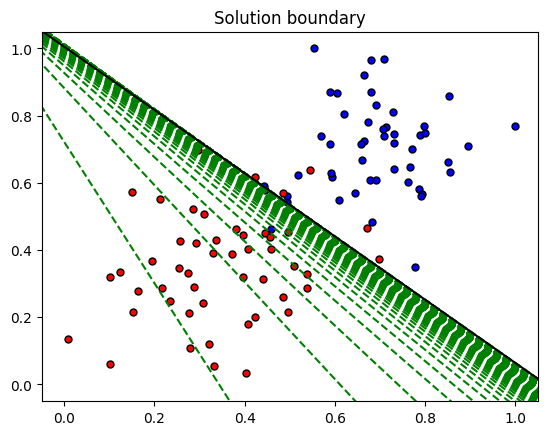

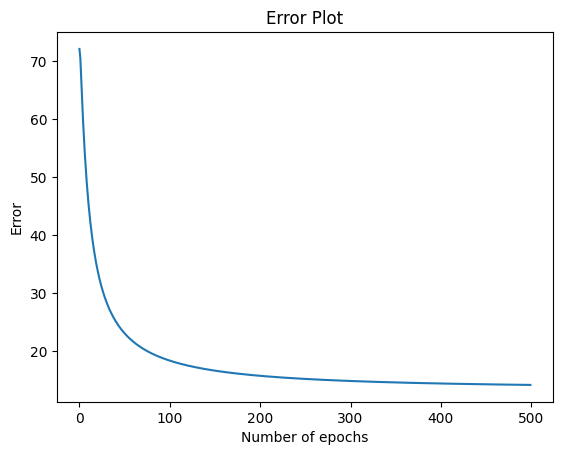

In [ ]:
train(X, y, epochs, learnrate, True)